# Completing the Picture II

*Review, missing pieces and projects*

## Today

1. Theory
  - Classification
  - Categorical data
  - Supplements
1. Exercises and questions
  - General feedback on submissions
  - Dicussion and solution
1. Group projects
  - Documents and deadlines
  - Group allocation
  - Checklist

# Classification

Dealing with *qualitative* response variables.

---

Based on ISL.

## Why Not Linear Regression?

Encoding should not matter:
- Numerical/quantitative representation of categories should be irrelevant
- Linear regression implies ordering

We are often interested in probabilities, i.e. values $\in [0,1]$:
- How likely is a certain outcome?
- Output of linear regression is unbound (cf. discussion of advertising data)


## Logistic Regression

Idea:
- Transform output of linear regression using a sigmoid function

<img src="../images/isl/isl_4.2_logistic_regression.png" alt="Accuracy, precision and bias" width="600">

Comments:
- Despite its name, logistic regression is a classification method
- Logistic regression is a special case of [Generalized linear models](https://en.wikipedia.org/wiki/Generalized_linear_model#Link_function)
- In scikit-learn: [Logisitic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
X, y = load_iris(return_X_y=True)
print('X:', X[:5, :], sep='\n')
print('y:', y[:5], sep='\n')
print('np.unique(y):', np.unique(y))

X:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
y:
[0 0 0 0 0]
np.unique(y): [0 1 2]


In [3]:
# create model
clf = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=500)
# fit
clf.fit(X, y)
# predict
clf.predict(X[:2])

array([0, 0])

In [4]:
# predict class probabilities
clf.predict_proba(X[:2]) 

array([[9.81583877e-01, 1.84161087e-02, 1.44880099e-08],
       [9.71342893e-01, 2.86570769e-02, 3.01615124e-08]])

In [5]:
# compute score
clf.score(X, y)

0.9733333333333334

## Categorical Data

Dealing with *categorical* data.

---

Group projects: it may be necessary to *preprocess* the data

### Describing non-numerical values

Q:
- How do we compute a summary statistics for non-numerical values?

A:
- We treat them differently.

In [5]:
import pandas as pd
import seaborn as sns

%matplotlib inline
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [6]:
# default summary statistics only covers numerical variables
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [7]:
# we can include all by setting the corresponding paramter
df.describe(include='all')

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


In [8]:
# however, to obtain a better undestanding, it may make sense to look at them
# separately
print('sex:', df['sex'].value_counts(), sep='\n')
print()
print('smoker:', df['smoker'].value_counts(), sep='\n')
print()
print('day:', df['day'].value_counts(), sep='\n')
print()
print('time:', df['time'].value_counts(), sep='\n')

sex:
Male      157
Female     87
Name: sex, dtype: int64

smoker:
No     151
Yes     93
Name: smoker, dtype: int64

day:
Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

time:
Dinner    176
Lunch      68
Name: time, dtype: int64


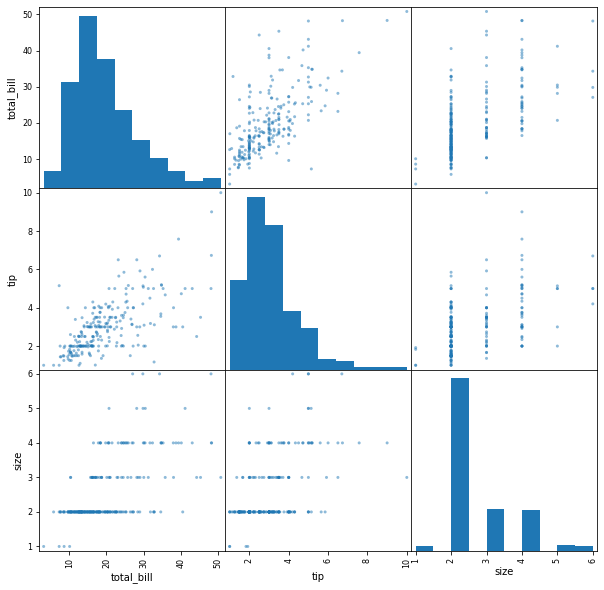

In [9]:
axs = pd.plotting.scatter_matrix(df, figsize=(10, 10))

### Categorical plots

Q:
- How do we deal with categorical values in visualizations?

A:
- Different options, very common to use categories as grouping variables.


See [seaborn](https://seaborn.pydata.org/api.html) for statistical data visualizations.

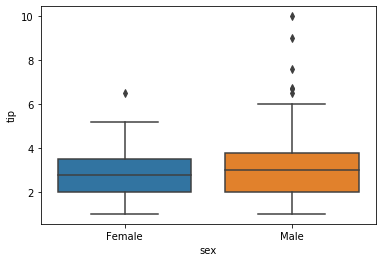

In [20]:
import seaborn as sns

sns.boxplot(data=df, y='tip', x='sex')

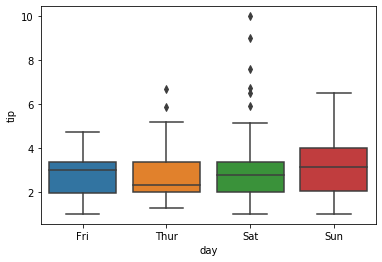

In [23]:
sns.boxplot(data=df, y='tip', x='day', order=['Fri', 'Thur', 'Sat', 'Sun'])

### Transforming non-numerical values

Q:
- How do we deal with non-numerical values?

A:
- We transform, i.e. encode them.

---

*Every continuous variable can be discretized/vectorized/categorized (with loss of information).*

In [10]:
# turn categories into numerical values (encoding)
print('original:')
print(df.head())
print()

columns_to_transform = ['sex', 'smoker', 'day', 'time']
df_transformed = df.copy()  # we leave the original data untouched
for column in columns_to_transform:
    labels, unique = pd.factorize(df_transformed[column])
    df_transformed[column] = labels
    
print('transformed:')
print(df_transformed.head())

original:
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

transformed:
   total_bill   tip  sex  smoker  day  time  size
0       16.99  1.01    0       0    0     0     2
1       10.34  1.66    1       0    0     0     3
2       21.01  3.50    1       0    0     0     3
3       23.68  3.31    1       0    0     0     2
4       24.59  3.61    0       0    0     0     4


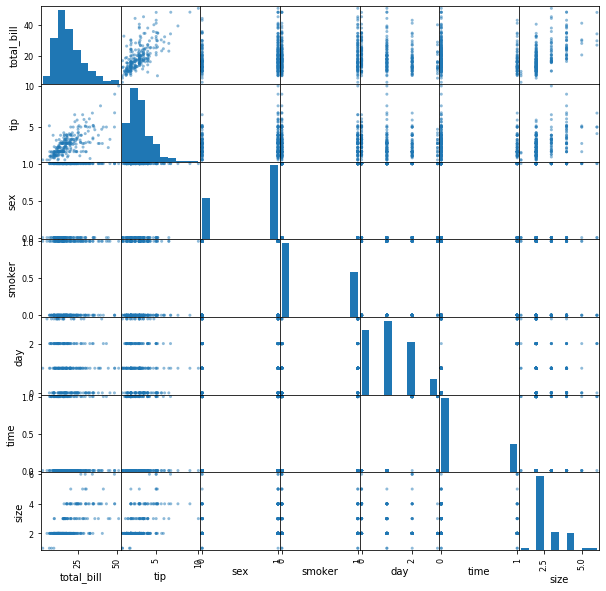

In [11]:
axs = pd.plotting.scatter_matrix(df_transformed, figsize=(10, 10))

In [12]:
# you can also replace values if you want to provide a custom mapping
# it may be easier to remember the encoding when it is done explicitely like here
custom_mapping = {'Male': 0, 'Female': 1}
df_transformed['sex'] = df['sex'].replace(custom_mapping)
df_transformed['sex']

0      1
1      0
2      0
3      0
4      1
      ..
239    0
240    1
241    0
242    0
243    1
Name: sex, Length: 244, dtype: int64

### Using categorical data in a model

Q:
- Can we directly feed numerical categorical data into a model?

A: Depends on the model:

- Some models (like tree-based models) support categorical variables out of the box.
- Others (like the classical linear model) require variable transformations.

See also the [scikit-learn user guide](https://scikit-learn.org/stable/modules/preprocessing.html).

Q:
- Why/when do we (usually) not pass categorical data directly into e.g. a linear regression model?

A:
- Encoding and ordering should not matter

Idea:
- One-hot or dummy encode variables

#### Categorical to integer code

[`OrdinalEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html#sklearn.preprocessing.OrdinalEncoder) can be used to convert categorical features to integer codes.

This is similar to `pd.factorize`.

---

Group projects: use `pd.factorize` as first preprocessing step.

In [13]:
# choose a more interesting example displaying several categories at once
df_example = df.iloc[[0, 1, 200, 100, 240, 241, 243]]
df_example

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
200,18.71,4.00,Male,Yes,Thur,Lunch,3
100,11.35,2.50,Female,Yes,Fri,Dinner,2
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [14]:
from sklearn.preprocessing import OrdinalEncoder

X = df_example[['sex', 'day']].head()
print('original:')
print(X)
print()
encoder = OrdinalEncoder()
X_transformed = encoder.fit_transform(X)
print('transformed:')
print(X_transformed)

original:
        sex   day
0    Female   Sun
1      Male   Sun
200    Male  Thur
100  Female   Fri
240  Female   Sat

transformed:
[[0. 2.]
 [1. 2.]
 [1. 3.]
 [0. 0.]
 [0. 1.]]


#### Categorical to one-hot or dummy encoding

[`OneHotEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder) is used to convert categorical features into one-hot or dummy encoded variables.

---

Group projects: do not forget to one-hot encode variables with more than two categories if your model does not support categorical input

In [15]:
from sklearn.preprocessing import OneHotEncoder

X = df_example[['sex', 'day']].head()
print('original:')
print(X)
print()
encoder = OneHotEncoder()
X_transformed = encoder.fit_transform(X)
print('transformed (without dropping first):')
# print(X_transformed)
print(X_transformed.toarray())  # observe the co-linearity we created

original:
        sex   day
0    Female   Sun
1      Male   Sun
200    Male  Thur
100  Female   Fri
240  Female   Sat

transformed (without dropping first):
[[1. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 1.]
 [1. 0. 1. 0. 0. 0.]
 [1. 0. 0. 1. 0. 0.]]


In [16]:
encoder = OneHotEncoder(drop='first')  # to encode each column into (n_categories - 1) columns
X_transformed = encoder.fit_transform(X)
print('transformed:')
# print(X_transformed)
print(X_transformed.toarray())

transformed:
[[0. 0. 1. 0.]
 [1. 0. 1. 0.]
 [1. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]]


#### Preprocessing in a pipeline

[`ColumnTransformer`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html#sklearn.compose.ColumnTransformer) is used to apply several (different) transformations to a DataFrame at once.

---

Group projects: if necessary, create a pipeline to simplify matters

In [17]:
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(
    [
        ('encoder', OneHotEncoder(drop='first'), ['sex', 'day']), 
        # we could add an additional transformer here as well, e.g. to
        # perform feature scaling
    ], 
    remainder='passthrough',  # to not drop but pass through variables 
                              # that are not transformed
)

X = df[['sex', 'day', 'total_bill']]
print('original:')
print(X)
print()
ct.fit(X)  # we can call fit and transform independently
X_transformed = ct.transform(X)
print('transformed:')
print(X_transformed)

original:
        sex   day  total_bill
0    Female   Sun       16.99
1      Male   Sun       10.34
2      Male   Sun       21.01
3      Male   Sun       23.68
4    Female   Sun       24.59
..      ...   ...         ...
239    Male   Sat       29.03
240  Female   Sat       27.18
241    Male   Sat       22.67
242    Male   Sat       17.82
243  Female  Thur       18.78

[244 rows x 3 columns]

transformed:
[[ 0.    0.    1.    0.   16.99]
 [ 1.    0.    1.    0.   10.34]
 [ 1.    0.    1.    0.   21.01]
 ...
 [ 1.    1.    0.    0.   22.67]
 [ 1.    1.    0.    0.   17.82]
 [ 0.    0.    0.    1.   18.78]]


In [18]:
# example of how to use ColumnTransformer in a pipeline
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline 

X = df[['sex', 'day', 'total_bill']]
y = df['tip']

regressor = LinearRegression()

model = Pipeline(
    [
        ('preprocessor', ct), 
        ('regressor', regressor)
    ]
)

model.fit(X, y)
model.score(X, y)

0.4590402587468897

## Multiclass Classification

Multiclass: more than 2 response classes

Q:
- Which models support multiclass classification?

A:
- Some models natively support multiclass classification (e.g. tree-based methods).
- Models can be combined in a *one vs. all* fashion to produce a multiclass classifier.


# Supplements

## Ensemble Methods

> Combine multiple models to obtain better predictive performance.

Requirements:
- Different models
- Aggregation of results

---

*In practical applications (with a focus on predictive performance) ensemble methods are widely used.*

Two approaches:
- Averaging: build several independent models
- Boosting: build models sequentially

Comments:
- [Scikit-learn provides models for both](https://scikit-learn.org/stable/modules/ensemble.html#ensemble)
- [RandomForests](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier) are a classical example (reduce variance by aggregating many models)
- Ensemble methods may scale to very large data sets

## Bias Variance Trade-Off

> Trade-off between prediction accuracy and model interpretability


<a href="http://faculty.marshall.usc.edu/gareth-james/ISL/">
<img src="../images/isl/isl_2.7_bias_variance_trade_off.png" alt="Bias Variance Trade-Off" width="80%">
</a>

---

*In general, you cannot have both. Depends on use case what is more important to you.*

## Variable Importance

Q:
- Which variable importance measures do you know already?

A:
- Coefficients in linear regression if variable have same scale
- RandomForest feature importance

### Permutation Importance

Idea:
- The output of a model depends on different variables
- We *destroy* the information in one variable
- We observe how model performance then deteriorates
- The larger the effect, the more important the variable must be

Notes:
- This is independent of the model used
- *destroy information* e.g. through permuting values

See also:
- [Interpretable ML](https://christophm.github.io/interpretable-ml-book/)
- [ELI5](https://eli5.readthedocs.io/en/latest/overview.html)
- Example in "california housing" exercise

### Further Reading

Scikit-learn user guide:
- [Model selection and evaluation](https://scikit-learn.org/stable/model_selection.html)
- [Dataset transformations](https://scikit-learn.org/stable/data_transforms.html)

The [tutorial](https://scikit-learn.org/stable/tutorial/index.html) also lists a lot of
helpful examples.

---

[10 minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html) is a good wrap up of how some common operations are carried out in pandas.

---

[matplotlib](https://matplotlib.org/index.html) comes with a large gallery of example plots in case you need something we have not yet covered.

---

For easy-to-create statistical data visualizations, take a look at [seaborn](https://seaborn.pydata.org/).

# Projects

See [here](https://github.com/caichinger/MLMNC2020/projects).

# Exercises

## Let's review a few submissions together!

## Before we start:

> We have received some very nice solutions! Congratulations on the progress you have made already! \o/


Over all exercises and students:

|       |   total_score |
|:------|--------------:|
| count |     90        |
| mean  |      0.860766 |
| std   |      0.159342 |
| min   |      0.138889 |
| 25%   |      0.808333 |
| 50%   |      0.883333 |
| 75%   |      0.9825   |
| max   |      1        |

### Examples

*What do you like? What can be improved?*

Q:

2. Compare the decision boundaries between the `RandomForestClassifier` and the `KNeighborsClassifier`. How do they differ?

A:

The RandomForestClassifier exhibits linear and horizontal decision boundaries whereas the KNeighborsClassifier does not assume any specific form (apart from forming neighborhoods).	the kneighborsclassifier ignores outliers, thus the line is much smoother when and  thus it is easier to interpret  however, the random forest classifier is more accurate because it includes the outliers but it makes it harder to interpret


Q:

1/b) Setting a lower but fixed value for `noise` and varying `n_neighbors`.

A:

If we choose n_neighbors too small (=1) the boundary becomes too flaky; the model is too flexible. There seems to be a good choice that roughly captures the shape of the expected boundary. If we choose n_neighbors too large (=50) we loose details; the model is no longer flexible enough.


Q:

2. What does `pd.plotting.scatter_matrix()` tell us about the data?

A:

It creates creates nxn plots where      off the diagonal: scatter plots are used to visualize correlation between variables     on the diagonal: the distribution of a variable is visualized 	This command shows a great overview of the correlation between the given input (TV, Radio, Newspaper) variable and the output (Sales) variable. The computed matrix of scatter plots visualizes the relationship between the variables and thereby complements df.corr() smoothly. Again, the abovementioned relationships/correlations between the variables can be observed. E.g., TV ads have the strongest linear and positive influence on sales, as can be seen in the upper-right corner matrix.


Q:

1. Why did we decide to scale the inputs?

A:

We wanted to infer variable importance by comparing the coefficients. Therefore, the variables need to share the same scale.	We decided to scale the inputs to be able to accurately compare the correlation coefficients of TV, radio and newspaper advertising spending and sales in the model. Beforehand, the correlation coefficients were not comparable between the three advertising variables, as they depend on the respective scales.


Q:

1. Why did we decide to scale the inputs?

A:

We wanted to infer variable importance by comparing the coefficients. Therefore, the variables need to share the same scale.	We decided to scale the input variables to account for their different ranges and hence the effect on the coefficients. As a result, we achieve a higher comparability of the coefficients due to scaling and the model performs better.


Q:

3/b) Using one of the models, describe and interpret the effect on sales when spending  "an ever increasing amount on advertising". Is this behaviour reasonable?

A:

This behavior is not reasonable, cf. concept of diminishing returns.	Using the original model, an ever increasing amount of ad spending also leads to ever rising sales - the effect is especially strong for TV and radio. It can be assumed that this does not reflect reality, as the law of diminishing returns would imply that there is a point where sales would virtually remain the same, even if ad spendings are further increased. Therefore, the second model was created to account for these dynamics.


Q:

3. How do the decision regions differ between the default and the cross-validated model?

A:

Less fragmented, fewer details, coarser boundary. Maybe too coarse.	after cross validating, the decision regions become clearer and the model fit is better. Therefore we should cross validate the data first. 


Q:

3/b) Using one of the models, describe and interpret the effect on sales when spending  "an ever increasing amount on advertising". Is this behaviour reasonable?

A:

This behavior is not reasonable, cf. concept of diminishing returns.	much_ads = [[100000, 100000, 100000]] much_ads_sales = model.predict(much_ads) print(much_ads_sales) [-5.18937105e+09] This behaviour is not reasonable as sales cannot turn negative.  In "simple" linear model (without scaled inputs) sales would be predicted to become eternally high, which is also not reasonable.
 

Q:

3/b) Using one of the models, describe and interpret the effect on sales when spending  "an ever increasing amount on advertising". Is this behaviour reasonable?	 

A:


This behavior is not reasonable, cf. concept of diminishing returns.	2) An ever increasing amount of money: Code: from sklearn.linear_model import LinearRegression regressor = LinearRegression() regressor.fit(X_train, y_train) print(regressor.coef_) --- [0.04405928 0.1992875  0.00688245] The coefficients show that when we 

* increase TV spending by 1, then sales increase by 0.0441 
* increase radio spending by 1, then sales increase by 0.1993 
* increase newspaper spending by 1, then sales increase by 0.0069. I believe that this behavior is not reasonable as this means that we can increase spending forever and sales will always grow by these.

In practice, this is not true because we will reach a point where additional spending will not (or only slightly) increase sales. Hence, we can conclude that the model only performs well with realistic advertising spending (should be within the span of our test data set).


Q:

3. Based on your assessment, do you recommend to use the ML system or not? Provide an explanation.

A:

Based on this assessment, I do not recommend the ML system, because the probability of the model falsely predicting a positive outcome is quite high (0.29). Moreover, the loss for this case is -2000, which is rather high as well.


Q:

3. Based on your assessment, do you recommend to use the ML system or not? Provide an explanation.

A:

Yes, using the ML system is this case appears fairly accurate. The expected value is positive; that is, above zero. (This exercise was tricky due to axis labeling questions: changes on both axis from 0->1 (negative/positive) or vice versa had profound effect on result).   If my calculations are done right, the expected value of 84 means the predicted values of true positives (TP) and true negatives (TN), 300 and 100 respectively, are correctly represented by the EV of 84. The ML system therefore works, and can be used.


Q:

3. Based on your assessment, do you recommend to use the ML system or not? Provide an explanation.	

A:

In this case, I would not recommend to use this ML system for evaluation because, according to the confusion matrix, the model has only a 84% accuracy rate [(True Postive+True Negative)/Total], which should be improved to improve the confidence of the model. We have a 14% chance of getting a false positive (type 1 error). When we also take a look at the system's ability to detect events in the positive class, which is the sensitivity, we get a 71% rate (True positve + False Positive)/ Total Positives. Having these metrics, I assert that the performance of the system is insufficient to have a reliable prediction. Still, we have to check the context of our problem to understand the significance of having those test errors. When we take the current corona crisis as an example, a false negative would be detrimental as someone who is infected would not be put in quarantine, leading to further infections. If we take false positives as an example, it is problematic when someone is diagnosed with cancer and receives a treatment even though the person is healthy. 



Q:

3. Based on your assessment, do you recommend to use the ML system or not? Provide an explanation.	


A:

I would argue that the model does not perform well, as the expected value of an enitrely accurate model would be 228. Therefore, the current model's classification deviates by 50% from the correct classification of the underlying data. This also becomes apparent when plotting the decision boundaries of the model, where it seems that the data is overfitted.


Q:

4. List three specific tasks you consider important in tackling this problem.

A:

*	Feature Scaling, Data exploration, Choosing model variables

Q:

5. Perform three specific tasks (not necessarily the same) to approach a solution and describe your findings.	

A:

1. Latitude and longitude variables logically don't make any sense to put in a correlation unless they are converted into some other datapoints that tell us more about the region the unit is in. Besides, a quick correlation analysis shows that the house age also barely correlates with housing prices (unless they are really really old). All three variables can therefore be omitted from our model. 
2. For correlation analysis, I decided to try both LinearRegression() as well as GridSearchCV(). 
3. Both models were measured using mean_squared_error. Using the test_dataset (20% of the whole dataset), GridSearchCV seems to perform better than LinearRegression.


Q:

5. Perform three specific tasks (not necessarily the same) to approach a solution and describe your findings.

A:

* From the descriptive statistics table I got to know the minimum/maximum value, mean, etc. of each feature.
* From the histogram, I discovered that the attributes have different scales and this will probably have to be fixed.
* Median income, average number of rooms and house age had the biggest three coefficient with price. Therefore, these three has the largest correlation with the value of house.
* I created a scatter plot with geographical information(longitude, latitude) and this provided me an overall picture of high-density areas, i.e. Bay area, LA, etc. And i also created a color map that helped me see that the prices are higher in locations closer to ocean.
* Finding these patterns or information can be used to create more relevant features like 'ocean proximity' to better predict the price. As the next step, I will select the most appropriate model to predict the house value and then split the data into test and train set.


Q:

5. Perform three specific tasks (not necessarily the same) to approach a solution and describe your findings.

A:

* First, I tried linear regression and got poor r2 score of 0.595770232606166,
* I then tried to optimize the model by adding polynomial features, but cross-validation showed that "1" is the best feature, so it turned me back to the simple linear model that I already analyzed, 
* I then chose RandomForestClassifier model and applied cross-validation (grid search cv), which gave me r2 score of 0.8072513477374939. 


Q:

5. Perform three specific tasks (not necessarily the same) to approach a solution and describe your findings.

A:

* By exploring correlations between the various attributes and the median house value, I found the strongest correlations with median income, total rooms and median age. It is difficult to eliminate overfitting of the data. Linear regression is not the best choice for predicting the median house value.


Q: 

5. Perform three specific tasks (not necessarily the same) to approach a solution and describe your findings.


A: 

* It is a supervised learning task and a multiple regression problem, but more specifically a univariate regression problem because the goal is to use multiple features to make one prediction for each district.

* When I plotted the Price data using sns.distplot and noticed that the frequency for houses over 500000 is very high, so my assumption is that these are either outliers or the data is wrong. Because of this, I attempted to remove the outliers, but it didn’t work. Something in my code is wrong, but I believe that removing the outliers would make the model more accurate when testing the model with test data.

* In order to see if some variables had significant correlations, I created a heat map correlation matrix. From this matrix I can see that the top 2 positive correlations are average bedrooms – average rooms (85% correlation) and price – media income (69%). However, both of these correlations were to be expected, so it is not helpful in the analysis. Although, there was a strong negative correlation between block population and median house age in block. This leads me to wonder whether the population on the block decreases as the median age of the houses in a block increases, which could lead to the area being less desirable hence have a lower median house price, but an analysis on causation would need to be done to determine this.


## Takeaway Messages and Remarks

### Approaching and Discussing a Problem
1. Expectation: What do you expect based on your current knowledge? Write this down before you work on a problem.
1. Observation: What do you see? Describe your findings.
1. Interpretation: What does it mean and why does it matter? Explain cause and effect of your findings.

---

- Without clearly defined expectations, it is all too easy to fool yourself.
- Separating observation and interpretation facilitates the discussion. It makes it easier to review und improve.   Your observations could be correct even if your interpretations are not.

### Making Assertions

When you make an assertion, check it's plausibility if you have not done so already.

*Code allows you to play around and try things out - do that.*

### Wording / Concepts

Q:

- What does linear mean?

A: 

- Linear function in one variable $f(x) = ax + b$
- Linear relationship between $x$ and $y$ if it can be expressed as $y = f(x) = ax + b$
- Similarily in more dimension
- Graphically: A straight line (or a (hyper)plane)

---

*If something looks like a curve, it is not a linear relationship.*

Q:
- What is an outlier?

A:

- Outlier refers to a data point/record that differs significantly from other observations.

---

- By definition, an outlier is a rare event.
- If you are not explicitely interested in rare events, you do not want these events to 
  influence your model.
- Outliers may cause problems.
- Different ranges do not per se constitute outliers.
- Sometimes one is explicitely interested in outliers (outlier detection).

---

*The "california housing" data set contains a few outliers.*

Q:
- Model parameter vs. hyperparameter?

A:
- Hyperparameter is part of the model specification, defines family of possible models
- Model parameters are learned from the data (using `fit`)
- Hyperparameters are estimated using `GridSearch`*

---

*Additional hyperparameter search methods exist (random, model based, ...).

Examples:
- Coefficients in linear regression: model parameter
- Number of degrees in polynomial features fed into linear regression: hyperparameter
- Split-rules in decision tree: model parameter
- Max depth of tree: hyperparameter
- Number of estimators in random forest: hyperparameter

Q:
- What is (statistical) bias?
- Is bias a problem?

A:
- In general: consistent/structural deviation of result caused by systematic error in procedure
- In linear regression: intercept term (constant) is called bias
- Bias is considered problematic (often not known/considered)

---

- ML system may introduce or learn basis from data
- ML systems are not per se unbiased

---

**https://catalogofbias.org/**

[FAO](http://fao.org)'s basic statistical tools I

<img src="http://www.fao.org/3/w7295e2m.gif" alt="Accuracy" width="600">

[FAO](http://fao.org)'s basic statistical tools II

<img src="http://www.fao.org/3/w7295e2n.gif" alt="Accuracy, precision and bias" width="400">

Q:
- Train-test-split vs. cross validation (CV) vs. grid search vs. CV grid search?

A:
- Train-test-split:
  - split data into train and test set
  - different strategies: random subset, stratified split, ...
- CV:
  - perform train-test-split several times
  - different strategies: random, n-folds, ...
- Grid search:
  - Define parameter grid
  - For every parameter combination:
    1. Fit model on train
    2. Compute score on test
  - Choose best parameter combination
- CV grid search: combine both grid search and CV into one procedure
